In [1]:

!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib


  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.1
    Uninstalling tensorflow-2.3.1:
      Successfully uninstalled tensorflow-2.3.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rich 12.4.4 requires typing-extensions<5.0,>=4.0.0; python_version < "3.9", but you have typing-extensions 3.7.4.3 which is incompatible.


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

C:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


# Key points using Mp Holistic

In [2]:
#using the holistics
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities

In [3]:
# function for pipe detection
def mediapipe_detection(image,model):
    image  = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)#color is converted
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            #read feed
            ret,frame=cap.read()
            # Make Detections
            image,results = mediapipe_detection(frame,holistic)
            #Draw LandMarks
            draw_styled_landmarks(image,results)
            #show the screen
            cv2.imshow('OpenCV Feed',image)
            #break of the while loop
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

In [7]:
draw_landmarks(frame, results)

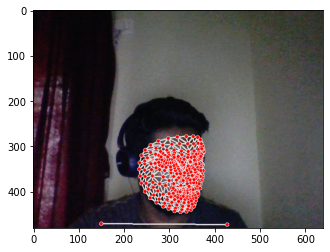

In [8]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extracting the Key values

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
face

array([ 0.54565859,  0.81470406, -0.01757682, ...,  0.57855332,
        0.67283279,  0.04000481])

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)


In [15]:
result_test

array([ 0.5234102 ,  0.74715841, -1.53350484, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0',result_test)

In [17]:
np.load('0.npy')

array([ 0.5234102 ,  0.74715841, -1.53350484, ...,  0.        ,
        0.        ,  0.        ])

# Setup Folders For collection

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [19]:
for action in actions: 
   # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [20]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# Preprocess Data nad create labels and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [26]:
sequences,labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(sequences).shape

(90, 30, 1662)

In [28]:
np.array(labels).shape

(90,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(90, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)

In [33]:
X_train,X_test,Y_train,Y_test  = train_test_split(X,y,test_size=0.05)

# Build and Train LSTM Nueral Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [49]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
model.fit(X_train, Y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 586ms/step - loss: 6.4008 - categorical_accuracy: 0.2955
Epoch 2/2000
3/3 [==============================] - 0s 107ms/step - loss: 12.8631 - categorical_accuracy: 0.2857
Epoch 3/2000
3/3 [==============================] - 0s 107ms/step - loss: 23.4535 - categorical_accuracy: 0.3386
Epoch 4/2000
3/3 [==============================] - 0s 100ms/step - loss: 10.4460 - categorical_accuracy: 0.3366
Epoch 5/2000
3/3 [==============================] - 0s 101ms/step - loss: 63.4536 - categorical_accuracy: 0.2818
Epoch 6/2000
3/3 [==============================] - 0s 106ms/step - loss: 46.7671 - categorical_accuracy: 0.3991
Epoch 7/2000
3/3 [==============================] - 0s 88ms/step - loss: 30.9391 - categorical_accuracy: 0.3171
Epoch 8/2000
3/3 [==============================] - 0s 92ms/step - loss: 9.2052 - categorical_accuracy: 0.3150
Epoch 9/2000
3/3 [==============================] - 0s 82ms/step - loss: 7.2923 - categorical_accura

3/3 [==============================] - 0s 85ms/step - loss: 2.1793 - categorical_accuracy: 0.3621
Epoch 74/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.0498 - categorical_accuracy: 0.3542
Epoch 75/2000
3/3 [==============================] - 0s 98ms/step - loss: 5.5749 - categorical_accuracy: 0.3268
Epoch 76/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.4883 - categorical_accuracy: 0.3953
Epoch 77/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.1827 - categorical_accuracy: 0.3523
Epoch 78/2000
3/3 [==============================] - 0s 100ms/step - loss: 4.1157 - categorical_accuracy: 0.2622
Epoch 79/2000
3/3 [==============================] - 0s 102ms/step - loss: 3.8748 - categorical_accuracy: 0.3836
Epoch 80/2000
3/3 [==============================] - 0s 82ms/step - loss: 4.7412 - categorical_accuracy: 0.3034
Epoch 81/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.8822 - categorical_accuracy: 0.2876
E

3/3 [==============================] - 0s 86ms/step - loss: 0.8333 - categorical_accuracy: 0.6418
Epoch 146/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.7840 - categorical_accuracy: 0.6223
Epoch 147/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7123 - categorical_accuracy: 0.6243
Epoch 148/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.8201 - categorical_accuracy: 0.5949
Epoch 149/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.7554 - categorical_accuracy: 0.6262
Epoch 150/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6973 - categorical_accuracy: 0.6869
Epoch 151/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.7229 - categorical_accuracy: 0.7006
Epoch 152/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.7138 - categorical_accuracy: 0.7143 0s - loss: 0.7420 - categorical_accuracy: 0.
Epoch 153/2000
3/3 [==============================] - 0s 55ms/step

3/3 [==============================] - 0s 55ms/step - loss: 0.5174 - categorical_accuracy: 0.7476
Epoch 218/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5040 - categorical_accuracy: 0.8082
Epoch 219/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5148 - categorical_accuracy: 0.8082
Epoch 220/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5274 - categorical_accuracy: 0.7710
Epoch 221/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4693 - categorical_accuracy: 0.8042
Epoch 222/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5187 - categorical_accuracy: 0.7515
Epoch 223/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5456 - categorical_accuracy: 0.7065
Epoch 224/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5032 - categorical_accuracy: 0.7377
Epoch 225/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5300 - categorical_accuracy: 0.724

3/3 [==============================] - 0s 60ms/step - loss: 1.0966 - categorical_accuracy: 0.3777
Epoch 290/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0534 - categorical_accuracy: 0.4031
Epoch 291/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0211 - categorical_accuracy: 0.4657
Epoch 292/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0150 - categorical_accuracy: 0.5381
Epoch 293/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.9777 - categorical_accuracy: 0.4461
Epoch 294/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9632 - categorical_accuracy: 0.4384
Epoch 295/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9550 - categorical_accuracy: 0.4853
Epoch 296/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.9486 - categorical_accuracy: 0.4657
Epoch 297/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9363 - categorical_accuracy: 0.561

3/3 [==============================] - 0s 55ms/step - loss: 0.6433 - categorical_accuracy: 0.7065
Epoch 362/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6209 - categorical_accuracy: 0.7222
Epoch 363/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6216 - categorical_accuracy: 0.7847
Epoch 364/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6160 - categorical_accuracy: 0.6966
Epoch 365/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6240 - categorical_accuracy: 0.6811
Epoch 366/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6092 - categorical_accuracy: 0.6732
Epoch 367/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5906 - categorical_accuracy: 0.7064
Epoch 368/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5936 - categorical_accuracy: 0.6810
Epoch 369/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5472 - categorical_accuracy: 0.755

3/3 [==============================] - 0s 55ms/step - loss: 0.7224 - categorical_accuracy: 0.6439
Epoch 434/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6182 - categorical_accuracy: 0.6732
Epoch 435/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6027 - categorical_accuracy: 0.7143
Epoch 436/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5134 - categorical_accuracy: 0.7749
Epoch 437/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5137 - categorical_accuracy: 0.7710
Epoch 438/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5198 - categorical_accuracy: 0.7378
Epoch 439/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4641 - categorical_accuracy: 0.7573
Epoch 440/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5036 - categorical_accuracy: 0.7554
Epoch 441/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5203 - categorical_accuracy: 0.696

3/3 [==============================] - 0s 47ms/step - loss: 0.4840 - categorical_accuracy: 0.7847
Epoch 506/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4331 - categorical_accuracy: 0.7671
Epoch 507/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.6006 - categorical_accuracy: 0.6830
Epoch 508/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.6243 - categorical_accuracy: 0.7025
Epoch 509/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5911 - categorical_accuracy: 0.7064
Epoch 510/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4715 - categorical_accuracy: 0.7671
Epoch 511/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5623 - categorical_accuracy: 0.7398
Epoch 512/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.7049 - categorical_accuracy: 0.6537
Epoch 513/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6549 - categorical_accuracy: 0.663

3/3 [==============================] - 0s 47ms/step - loss: 0.4693 - categorical_accuracy: 0.8004
Epoch 578/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5312 - categorical_accuracy: 0.7515
Epoch 579/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4948 - categorical_accuracy: 0.7221
Epoch 580/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4862 - categorical_accuracy: 0.7926
Epoch 581/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5297 - categorical_accuracy: 0.7084
Epoch 582/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4877 - categorical_accuracy: 0.7886
Epoch 583/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5288 - categorical_accuracy: 0.7044
Epoch 584/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.6326 - categorical_accuracy: 0.6595
Epoch 585/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5849 - categorical_accuracy: 0.706

3/3 [==============================] - 0s 47ms/step - loss: 0.3391 - categorical_accuracy: 0.8767
Epoch 650/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4199 - categorical_accuracy: 0.7104
Epoch 651/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4629 - categorical_accuracy: 0.7339
Epoch 652/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4186 - categorical_accuracy: 0.7925
Epoch 653/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4640 - categorical_accuracy: 0.7906
Epoch 654/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.3896 - categorical_accuracy: 0.8023
Epoch 655/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4151 - categorical_accuracy: 0.8023
Epoch 656/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.3743 - categorical_accuracy: 0.8571
Epoch 657/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.4355 - categorical_accuracy: 0.819

3/3 [==============================] - 0s 47ms/step - loss: 0.6812 - categorical_accuracy: 0.6654
Epoch 722/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.6866 - categorical_accuracy: 0.6653
Epoch 723/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6459 - categorical_accuracy: 0.7339
Epoch 724/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.6107 - categorical_accuracy: 0.7964
Epoch 725/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.6175 - categorical_accuracy: 0.6987
Epoch 726/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5812 - categorical_accuracy: 0.8141
Epoch 727/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5755 - categorical_accuracy: 0.8121
Epoch 728/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5791 - categorical_accuracy: 0.7808
Epoch 729/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.5783 - categorical_accuracy: 0.735

3/3 [==============================] - 0s 55ms/step - loss: 1.0988 - categorical_accuracy: 0.3405
Epoch 794/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0970 - categorical_accuracy: 0.3288
Epoch 795/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.1005 - categorical_accuracy: 0.3053
Epoch 796/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.1023 - categorical_accuracy: 0.3014
Epoch 797/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0984 - categorical_accuracy: 0.3366
Epoch 798/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0985 - categorical_accuracy: 0.3522
Epoch 799/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0992 - categorical_accuracy: 0.3092
Epoch 800/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0989 - categorical_accuracy: 0.3444
Epoch 801/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.1008 - categorical_accuracy: 0.301

3/3 [==============================] - 0s 47ms/step - loss: 1.0968 - categorical_accuracy: 0.3835
Epoch 866/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0973 - categorical_accuracy: 0.3796
Epoch 867/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0958 - categorical_accuracy: 0.3718
Epoch 868/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0988 - categorical_accuracy: 0.3562
Epoch 869/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0970 - categorical_accuracy: 0.3562
Epoch 870/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0964 - categorical_accuracy: 0.3757
Epoch 871/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0980 - categorical_accuracy: 0.3757
Epoch 872/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0964 - categorical_accuracy: 0.3601
Epoch 873/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0972 - categorical_accuracy: 0.367

3/3 [==============================] - 0s 47ms/step - loss: 1.1003 - categorical_accuracy: 0.3210
Epoch 938/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0987 - categorical_accuracy: 0.3327
Epoch 939/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0980 - categorical_accuracy: 0.3444
Epoch 940/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0967 - categorical_accuracy: 0.3601
Epoch 941/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.1004 - categorical_accuracy: 0.3210
Epoch 942/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0959 - categorical_accuracy: 0.3796
Epoch 943/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0975 - categorical_accuracy: 0.3366
Epoch 944/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0974 - categorical_accuracy: 0.3523
Epoch 945/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0972 - categorical_accuracy: 0.348

3/3 [==============================] - 0s 47ms/step - loss: 1.0977 - categorical_accuracy: 0.3640
Epoch 1010/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.1006 - categorical_accuracy: 0.3288
Epoch 1011/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0981 - categorical_accuracy: 0.3483
Epoch 1012/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0954 - categorical_accuracy: 0.3718
Epoch 1013/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0995 - categorical_accuracy: 0.3405
Epoch 1014/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0935 - categorical_accuracy: 0.3952
Epoch 1015/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0963 - categorical_accuracy: 0.3640
Epoch 1016/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0979 - categorical_accuracy: 0.3483
Epoch 1017/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0983 - categorical_accurac

3/3 [==============================] - 0s 47ms/step - loss: 1.1017 - categorical_accuracy: 0.3132
Epoch 1082/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0938 - categorical_accuracy: 0.3913
Epoch 1083/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1009 - categorical_accuracy: 0.3288
Epoch 1084/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0963 - categorical_accuracy: 0.3718
Epoch 1085/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0943 - categorical_accuracy: 0.4030
Epoch 1086/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0983 - categorical_accuracy: 0.3405
Epoch 1087/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0999 - categorical_accuracy: 0.3093
Epoch 1088/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0949 - categorical_accuracy: 0.3640
Epoch 1089/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0968 - categorical_accurac

3/3 [==============================] - 0s 78ms/step - loss: 1.0986 - categorical_accuracy: 0.3405
Epoch 1154/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0968 - categorical_accuracy: 0.3562
Epoch 1155/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0949 - categorical_accuracy: 0.3835
Epoch 1156/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.1004 - categorical_accuracy: 0.3132
Epoch 1157/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0991 - categorical_accuracy: 0.3288
Epoch 1158/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0957 - categorical_accuracy: 0.3679
Epoch 1159/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0997 - categorical_accuracy: 0.3288
Epoch 1160/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0998 - categorical_accuracy: 0.3210
Epoch 1161/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0944 - categorical_accurac

3/3 [==============================] - 0s 70ms/step - loss: 1.1013 - categorical_accuracy: 0.3093 0s - loss: 1.1050 - categorical_accuracy: 0.
Epoch 1226/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0980 - categorical_accuracy: 0.3483
Epoch 1227/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0982 - categorical_accuracy: 0.3405
Epoch 1228/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0975 - categorical_accuracy: 0.3562
Epoch 1229/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0948 - categorical_accuracy: 0.3796
Epoch 1230/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0960 - categorical_accuracy: 0.3718
Epoch 1231/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0957 - categorical_accuracy: 0.3718
Epoch 1232/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0983 - categorical_accuracy: 0.3405
Epoch 1233/2000
3/3 [==============================] - 0s 4

3/3 [==============================] - 0s 50ms/step - loss: 1.0941 - categorical_accuracy: 0.4030
Epoch 1297/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.1007 - categorical_accuracy: 0.3132
Epoch 1298/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0949 - categorical_accuracy: 0.3757
Epoch 1299/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0962 - categorical_accuracy: 0.3640
Epoch 1300/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0992 - categorical_accuracy: 0.3288
Epoch 1301/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0981 - categorical_accuracy: 0.3483
Epoch 1302/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0983 - categorical_accuracy: 0.3405
Epoch 1303/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0983 - categorical_accuracy: 0.3562
Epoch 1304/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0987 - categorical_accurac

3/3 [==============================] - 0s 69ms/step - loss: 1.0939 - categorical_accuracy: 0.3874
Epoch 1369/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0920 - categorical_accuracy: 0.3913
Epoch 1370/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0934 - categorical_accuracy: 0.3718
Epoch 1371/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0935 - categorical_accuracy: 0.3757
Epoch 1372/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1008 - categorical_accuracy: 0.3015
Epoch 1373/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0961 - categorical_accuracy: 0.3679
Epoch 1374/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0974 - categorical_accuracy: 0.3562
Epoch 1375/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0976 - categorical_accuracy: 0.3444
Epoch 1376/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0958 - categorical_accurac

3/3 [==============================] - 0s 78ms/step - loss: 1.0943 - categorical_accuracy: 0.3640
Epoch 1441/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0953 - categorical_accuracy: 0.3444
Epoch 1442/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0943 - categorical_accuracy: 0.3601
Epoch 1443/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.0965 - categorical_accuracy: 0.3444
Epoch 1444/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0915 - categorical_accuracy: 0.3796
Epoch 1445/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0967 - categorical_accuracy: 0.3210
Epoch 1446/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0965 - categorical_accuracy: 0.3562
Epoch 1447/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0965 - categorical_accuracy: 0.3483
Epoch 1448/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0966 - categorical_accurac

Epoch 1512/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0902 - categorical_accuracy: 0.3562
Epoch 1513/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0871 - categorical_accuracy: 0.3796
Epoch 1514/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0908 - categorical_accuracy: 0.3405
Epoch 1515/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0899 - categorical_accuracy: 0.3444
Epoch 1516/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0879 - categorical_accuracy: 0.3679
Epoch 1517/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0915 - categorical_accuracy: 0.3210
Epoch 1518/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0893 - categorical_accuracy: 0.3444
Epoch 1519/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0872 - categorical_accuracy: 0.3913
Epoch 1520/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0876 - c

3/3 [==============================] - 0s 65ms/step - loss: 1.0641 - categorical_accuracy: 0.5773
Epoch 1584/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0692 - categorical_accuracy: 0.4795
Epoch 1585/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0648 - categorical_accuracy: 0.5518
Epoch 1586/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.0648 - categorical_accuracy: 0.6047
Epoch 1587/2000
3/3 [==============================] - 0s 135ms/step - loss: 1.0636 - categorical_accuracy: 0.4187
Epoch 1588/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.0856 - categorical_accuracy: 0.3700
Epoch 1589/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.0642 - categorical_accuracy: 0.6007
Epoch 1590/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0648 - categorical_accuracy: 0.3660
Epoch 1591/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0621 - categorical_acc

3/3 [==============================] - 0s 63ms/step - loss: 0.9691 - categorical_accuracy: 0.6164
Epoch 1655/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9644 - categorical_accuracy: 0.6654
Epoch 1656/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9732 - categorical_accuracy: 0.5341
Epoch 1657/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9562 - categorical_accuracy: 0.6419
Epoch 1658/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9766 - categorical_accuracy: 0.5675
Epoch 1659/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0078 - categorical_accuracy: 0.3855
Epoch 1660/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9571 - categorical_accuracy: 0.6282
Epoch 1661/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.9536 - categorical_accuracy: 0.6301
Epoch 1662/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.9920 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 0.8377 - categorical_accuracy: 0.8004
Epoch 1727/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.8367 - categorical_accuracy: 0.6048
Epoch 1728/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8066 - categorical_accuracy: 0.8395
Epoch 1729/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7756 - categorical_accuracy: 0.6909
Epoch 1730/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7862 - categorical_accuracy: 0.8042
Epoch 1731/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.7760 - categorical_accuracy: 0.7633
Epoch 1732/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8361 - categorical_accuracy: 0.6438
Epoch 1733/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.8991 - categorical_accuracy: 0.4893
Epoch 1734/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.8582 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.7108 - categorical_accuracy: 0.8160
Epoch 1799/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7225 - categorical_accuracy: 0.7144
Epoch 1800/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7149 - categorical_accuracy: 0.7964
Epoch 1801/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6831 - categorical_accuracy: 0.7318
Epoch 1802/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7600 - categorical_accuracy: 0.7847
Epoch 1803/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7582 - categorical_accuracy: 0.6478
Epoch 1804/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6904 - categorical_accuracy: 0.7495
Epoch 1805/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7134 - categorical_accuracy: 0.7397
Epoch 1806/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7483 - categorical_accurac

3/3 [==============================] - 0s 61ms/step - loss: 0.6212 - categorical_accuracy: 0.8160
Epoch 1871/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6410 - categorical_accuracy: 0.7926
Epoch 1872/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6676 - categorical_accuracy: 0.7495
Epoch 1873/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7425 - categorical_accuracy: 0.7436
Epoch 1874/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6874 - categorical_accuracy: 0.7437
Epoch 1875/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7001 - categorical_accuracy: 0.8023
Epoch 1876/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6447 - categorical_accuracy: 0.7417
Epoch 1877/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6250 - categorical_accuracy: 0.8180
Epoch 1878/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6258 - categorical_accurac

3/3 [==============================] - 0s 59ms/step - loss: 1.0781 - categorical_accuracy: 0.4521
Epoch 1942/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0896 - categorical_accuracy: 0.3992
Epoch 1943/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0813 - categorical_accuracy: 0.3933
Epoch 1944/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0903 - categorical_accuracy: 0.3954
Epoch 1945/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0803 - categorical_accuracy: 0.4501
Epoch 1946/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0746 - categorical_accuracy: 0.4872
Epoch 1947/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0744 - categorical_accuracy: 0.4598
Epoch 1948/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0694 - categorical_accuracy: 0.4774
Epoch 1949/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0766 - categorical_accurac

In [52]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# Make Predictions 

In [53]:
res = model.predict(X_test)

In [54]:
actions[np.argmax(res[4])]


'iloveyou'

In [55]:
actions[np.argmax(Y_test[4])]


'iloveyou'

# Save Weights

In [56]:
model.save('action.h5')

In [46]:
#del model

In [57]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [59]:
yhat = model.predict(X_test)


In [61]:
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


In [62]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[2, 0],
        [3, 0]],

       [[3, 2],
        [0, 0]],

       [[2, 1],
        [0, 2]]], dtype=int64)

In [63]:
accuracy_score(ytrue, yhat)


0.4

# Test in Real Time

In [64]:
from scipy import stats

In [67]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [68]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>